In [1]:
!pip install pandas numpy scikit-learn nltk textblob gensim spacy transformers matplotlib seaborn
!python -m spacy download en_core_web_sm
!python -m nltk.downloader punkt wordnet omw-1.4 stopwords

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   U

In [7]:




import pandas as pd
import numpy as np
import re
import nltk
import spacy
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
from gensim.models import Word2Vec, FastText
from gensim.utils import simple_preprocess
import warnings
warnings.filterwarnings("ignore")

# NLTK & SpaCy
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **1.Text Pre-processing on file.txt**

In [6]:
# a. Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
import spacy

# Auto-create file.txt with improper text
file_content = """
Natural language processing (NLP) is a sub-field of artificial intelligence, concerned with the interactions between computers and human (natural) languages. In particular, it deals with programming computers to process and analyze large amounts of natural language data.

NLP is used in many applications such as: machine translation, sentiment analysis, speech recognition, chatbots and information retrieval.

Some common challenges include: ambiguity in language, sarcasm, slang, and misspellings. For example, the sentence "I saw a man on a hill with a telescope." can have multiple meanings.

Here are some sample sentences with errors:
- "Ths sentnce has speling erors."
- "I luv programing in pyhton!!!"
- "Artifical inteligence is the future..."

NLP techniques help clean and normalize such texts. Tokenization breaks text into words, stemming reduces words to root form, lemmatization considers context, and stop-word removal eliminates common words like "the", "is", "and".

Named entity recognition (NER) identifies names of people, organizations, locations. For example: "Apple Inc. is based in Cupertino, California."

Finally, sentence boundary detection splits text into sentences. This is important for summarization and translation.
"""

with open("file.txt", "w", encoding="utf-8") as f:
    f.write(file_content.strip())

print("file.txt created successfully!")
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nlp = spacy.load("en_core_web_sm")

# b. Load the text corpus
with open("file.txt", "r", encoding="utf-8") as f:
    text = f.read()

print("Original text length:", len(text))
print(text[:500], "\n")

# c. Tokenization
tokens = word_tokenize(text.lower())
print("First 30 tokens:", tokens[:30])

# d. Spelling correction
corrected_tokens = []
for token in tokens:
    corrected = str(TextBlob(token).correct())
    corrected_tokens.append(corrected)

corrected_text = " ".join(corrected_tokens)
print("\nFirst 10 corrected tokens:", corrected_tokens[:10])
print("\nCorrected text (first 200 chars):", corrected_text[:200])

# e. POS tagging on corrected tokens
pos_tags = nltk.pos_tag(corrected_tokens)
print("\nPOS tags (first 10):", pos_tags[:10])

# f. Remove stop words
stop_words = set(stopwords.words("english"))
filtered_tokens = [t for t in corrected_tokens if t not in stop_words and t.isalpha()]
print("\nFirst 20 tokens after stop-word removal:", filtered_tokens[:20])

# g. Stemming & Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed = [stemmer.stem(t) for t in filtered_tokens]
lemmatized = [lemmatizer.lemmatize(t) for t in filtered_tokens]

print("\nStemmed (first 20):", stemmed[:20])
print("Lemmatized (first 20):", lemmatized[:20])

# h. Sentence boundaries
sentences = sent_tokenize(text)
print(f"\nTotal number of sentences: {len(sentences)}")

file.txt created successfully!


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Original text length: 1253
Natural language processing (NLP) is a sub-field of artificial intelligence, concerned with the interactions between computers and human (natural) languages. In particular, it deals with programming computers to process and analyze large amounts of natural language data. 

NLP is used in many applications such as: machine translation, sentiment analysis, speech recognition, chatbots and information retrieval. 

Some common challenges include: ambiguity in language, sarcasm, slang, and misspellin 

First 30 tokens: ['natural', 'language', 'processing', '(', 'nlp', ')', 'is', 'a', 'sub-field', 'of', 'artificial', 'intelligence', ',', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', '.', 'in', 'particular', ',', 'it']

First 10 corrected tokens: ['natural', 'language', 'processing', '(', 'nap', ')', 'is', 'a', 'sub-field', 'of']

Corrected text (first 200 chars): natural language processing ( n

### **2.Feature Extraction on 20newsgroups**

In [ ]:
# a. Import packages
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# b. Fetch dataset
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame({'text': data.data, 'target': data.target})

# c. Clean data
def clean_text(txt):
    txt = txt.lower()
    txt = re.sub(r'[^a-z\s]', '', txt)
    txt = re.sub(r'\s+', ' ', txt).strip()
    return txt

df['cleaned'] = df['text'].apply(clean_text)

# d. BoW model
bow_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow_matrix = bow_vectorizer.fit_transform(df['cleaned'])
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

# e. TF-IDF model
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# f. Compare top 20 frequent words
bow_sums = bow_df.sum().sort_values(ascending=False).head(20)
tfidf_sums = tfidf_df.sum().sort_values(ascending=False).head(20)

print("BoW Top 20 words:\n", bow_sums)
print("\nTF-IDF Top 20 words:\n", tfidf_sums)

BoW Top 20 words:
 dont                               6433
like                               6391
people                             6294
just                               6155
know                               5752
use                                4989
think                              4983
time                               4601
does                               4489
new                                4034
im                                 4004
good                               3878
make                               3334
way                                3328
maxaxaxaxaxaxaxaxaxaxaxaxaxaxax    3317
used                               3028
say                                3007
did                                2989
god                                2949
right                              2944
dtype: int64

TF-IDF Top 20 words:
 like      324.598339
just      322.250787
know      318.619716
dont      317.050850
think     271.152683
does      267.344562
people    265.96768

**3.Amazon Musical Instruments Reviews**

Original Data:
                                          reviewText  Overall
0  Not much to write about here, but it does exac...        5
1  The product does exactly as it should and is q...        4
2  The primary job of this device is to block the...        3
3  Nice windscreen protects my MXL mic and preven...        5
4  This pop filter is great. It looks and perform...        4
5   So good that I bought another one. Love the h...        4
6  I have used monster cables for years, and with...        5
7  I now use this cable to run from the output of...        5
8   Perfect for my Epiphone Sheraton II. Monster ...        3
9  Monster makes the best cables and a lifetime w...        4


Cleaned Reviews (first 3):
1. not much to write about here but it does exac
2. the product does exactly as it should and is q
3. the primary job of this device is to block the


TF-IDF Matrix Shape: (10, 70)
Features (sample): ['best' 'best cables' 'block' 'bought' 'bought love' 'cable' 'cable run'
 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


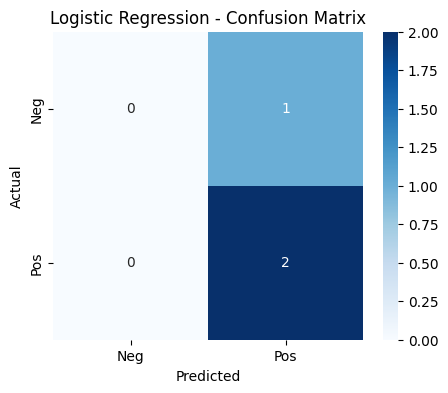

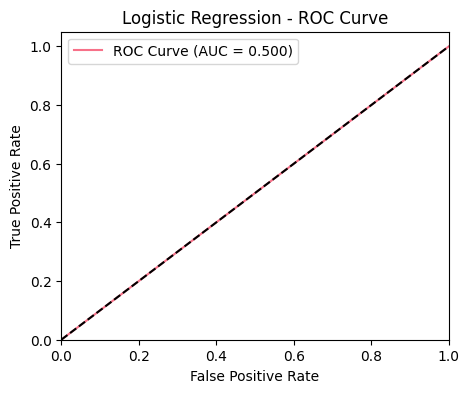


==================== Naive Bayes ====================
Accuracy: 0.667

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


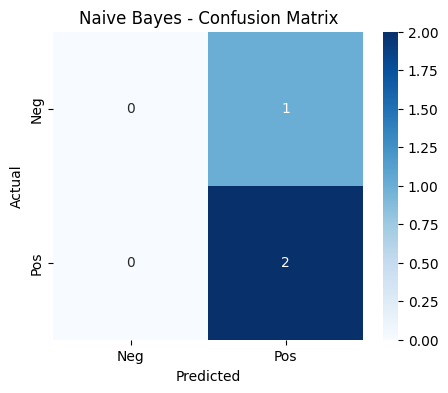

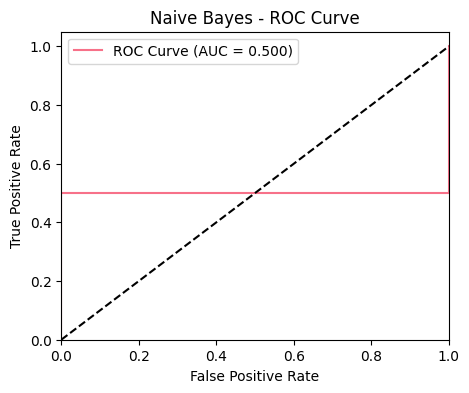


==================== KNN ====================
Accuracy: 0.667

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


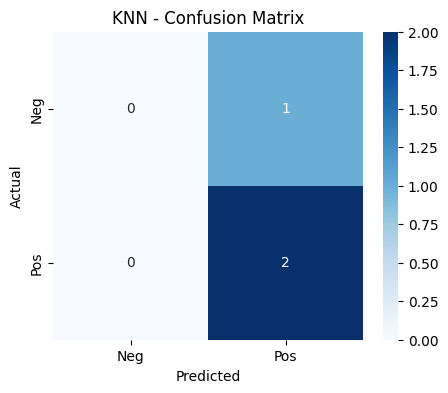

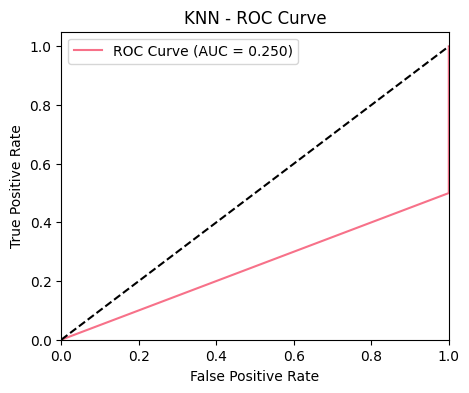


==================== Decision Tree ====================
Accuracy: 0.667

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


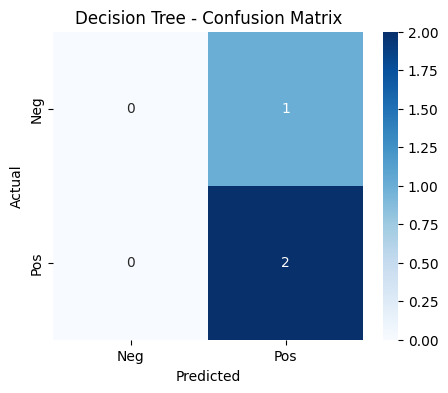

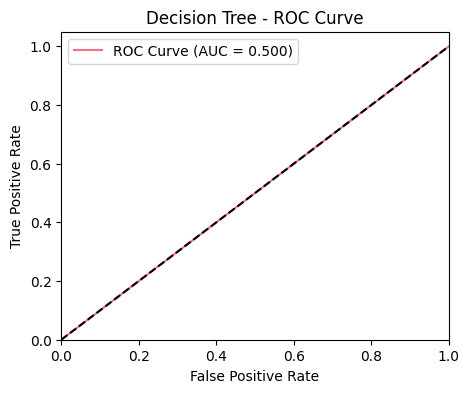


==================== Random Forest ====================
Accuracy: 0.667

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


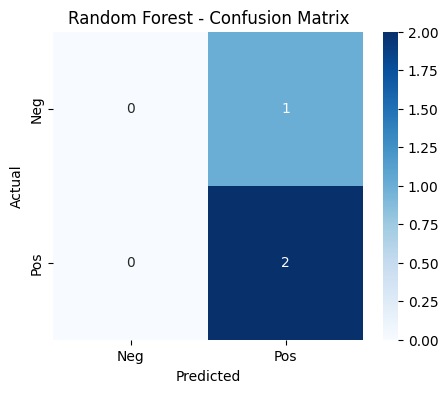

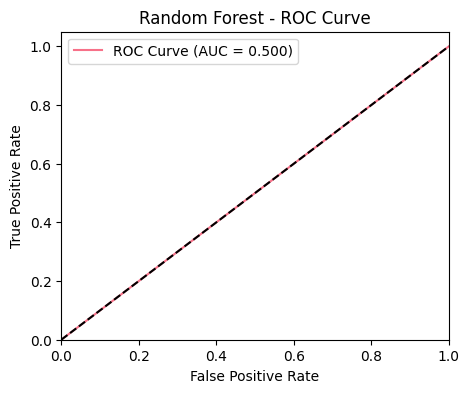


==================== GBM ====================
Accuracy: 0.667

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


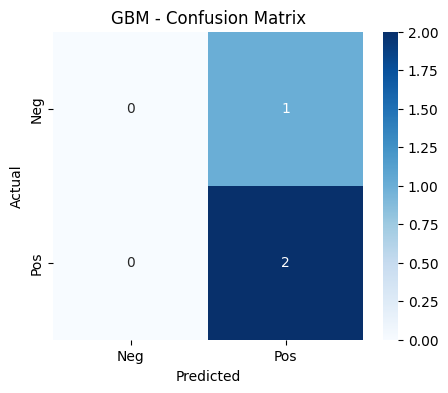

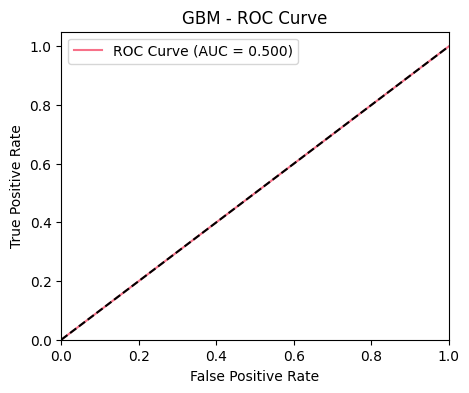


==================== XGBoost ====================
Accuracy: 0.667

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
    Positive       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:17:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s

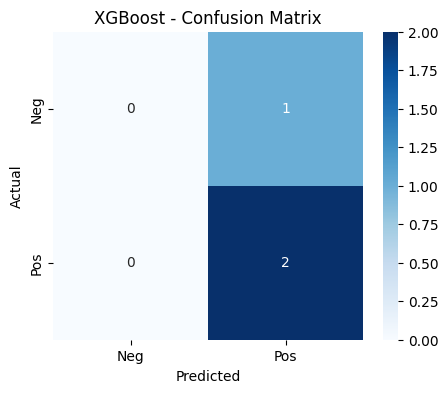

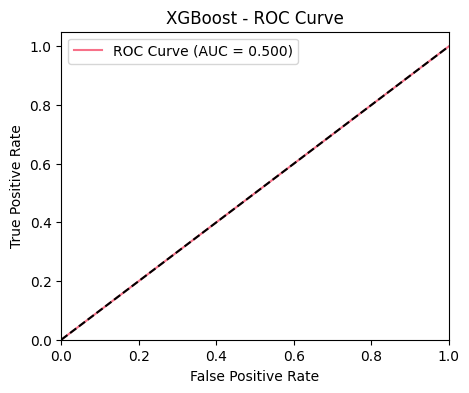



REGRESSION RESULTS
------------------------------------------------------------
Linear Regression         → MSE: 0.840 | RMSE: 0.916
Decision Tree Reg         → MSE: 2.000 | RMSE: 1.414
Random Forest Reg         → MSE: 1.587 | RMSE: 1.260
GBM Reg                   → MSE: 2.000 | RMSE: 1.414
XGB Reg                   → MSE: 1.998 | RMSE: 1.414

SAMPLE PREDICTION (First Review):
Logistic Regression      : Positive (Prob: 0.877)
Naive Bayes              : Positive (Prob: 0.913)
KNN                      : Positive (Prob: 1.000)
Decision Tree            : Positive (Prob: 1.000)
Random Forest            : Positive (Prob: 0.990)
GBM                      : Positive (Prob: 1.000)
XGBoost                  : Positive (Prob: 0.857)


In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_curve, auc, mean_squared_error
)

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

# Regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# Set style
sns.set_palette("husl")

# =============================================
# a. Data Input
# =============================================

data = {
    "reviewText": [
        "Not much to write about here, but it does exac...",
        "The product does exactly as it should and is q...",
        "The primary job of this device is to block the...",
        "Nice windscreen protects my MXL mic and preven...",
        "This pop filter is great. It looks and perform...",
        "So good that I bought another one. Love the h...",
        "I have used monster cables for years, and with...",
        "I now use this cable to run from the output of...",
        "Perfect for my Epiphone Sheraton II. Monster ...",
        "Monster makes the best cables and a lifetime w..."
    ],
    "Overall": [5, 4, 3, 5, 4, 4, 5, 5, 3, 4]
}

df = pd.DataFrame(data)
print("Original Data:")
print(df)
print("\n" + "="*60 + "\n")

# =============================================
# b. Clean reviewText
# =============================================

def clean_review(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

df['cleaned_review'] = df['reviewText'].apply(clean_review)

print("Cleaned Reviews (first 3):")
for i in range(3):
    print(f"{i+1}. {df['cleaned_review'].iloc[i]}")
print("\n" + "="*60 + "\n")

# =============================================
# c. TF-IDF Feature Extraction
# =============================================

vectorizer = TfidfVectorizer(
    max_features=100,
    stop_words='english',
    ngram_range=(1,2),  # Include bigrams for richer features
    min_df=1
)

X = vectorizer.fit_transform(df['cleaned_review'])
feature_names = vectorizer.get_feature_names_out()

print(f"TF-IDF Matrix Shape: {X.shape}")
print(f"Features (sample): {feature_names[:10]}")
print("\n" + "="*60 + "\n")

# Target for classification: 1 = Positive (4–5), 0 = Negative (1–3)
y_class = (df['Overall'] >= 4).astype(int)  # Critical Fix: Use 0 and 1
y_reg = df['Overall']

# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.3, random_state=42, stratify=y_class
)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y_reg, test_size=0.3, random_state=42
)

# =============================================
# d. Models Definition
# =============================================

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GBM": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Reg": DecisionTreeRegressor(random_state=42),
    "Random Forest Reg": RandomForestRegressor(n_estimators=100, random_state=42),
    "GBM Reg": GradientBoostingRegressor(random_state=42),
    "XGB Reg": xgb.XGBRegressor(random_state=42)
}

# =============================================
# e. Evaluation Function (Classification)
# =============================================

def evaluate_classification(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n{'='*20} {name} {'='*20}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
        plt.plot([0,1], [0,1], 'k--')
        plt.xlim([0,1]); plt.ylim([0,1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"{name} - ROC Curve")
        plt.legend()
        plt.show()

# =============================================
# CLASSIFICATION RESULTS
# =============================================

print("\nCLASSIFICATION RESULTS\n" + "-"*60)
for name, clf in classifiers.items():
    clf.fit(X_train_c, y_train_c)
    evaluate_classification(clf, X_test_c, y_test_c, name)

# =============================================
# REGRESSION RESULTS
# =============================================

print("\n\nREGRESSION RESULTS\n" + "-"*60)

for name, reg in regressors.items():
    reg.fit(X_train_r, y_train_r)
    y_pred = reg.predict(X_test_r)
    mse = mean_squared_error(y_test_r, y_pred)
    print(f"{name:25} → MSE: {mse:.3f} | RMSE: {np.sqrt(mse):.3f}")

# Optional: Predict on first review
print("\n" + "="*60)
print("SAMPLE PREDICTION (First Review):")
sample = vectorizer.transform([df['cleaned_review'].iloc[0]])
for name, clf in classifiers.items():
    pred = clf.predict(sample)[0]
    prob = clf.predict_proba(sample)[0]
    print(f"{name:25}: {'Positive' if pred==1 else 'Negative'} (Prob: {prob[pred]:.3f})")

### **4.IMDB Sentiment Analysis (Kaggle)**

In [2]:
from google.colab import files
import os

if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle", exist_ok=True)

print("Please upload your kaggle.json file:")
uploaded = files.upload()                     # <-- Upload kaggle.json
for fn in uploaded.keys():
    os.rename(fn, "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

# --------------------------------------------------------------
# 3. Download the exact dataset you mentioned
# --------------------------------------------------------------
!kaggle datasets download -d columbine/imdb-dataset-sentiment-analysis-in-csv-format --unzip

# The dataset contains Train.csv and Test.csv
# We will use Test.csv as per your instruction
csv_path = "Test.csv"   # <-- This is the file we need
print(f"\nDataset ready: {csv_path}")

# --------------------------------------------------------------
# 4. Import libraries
# --------------------------------------------------------------
import pandas as pd
import re
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

# --------------------------------------------------------------
# 5. Load the CSV file
# --------------------------------------------------------------
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows from {csv_path}")
print(df.head())

# --------------------------------------------------------------
# 6. Fetch the text column
# --------------------------------------------------------------
# The column is named 'text' in this dataset
texts = df['text'].astype(str).copy()

# --------------------------------------------------------------
# 7. Extract and remove @handles
# --------------------------------------------------------------
def remove_handles(t):
    return re.sub(r'@\w+', '', t)

texts_clean = texts.apply(remove_handles)

# --------------------------------------------------------------
# 8. Perform sentiment analysis using TextBlob
# --------------------------------------------------------------
def get_sentiment(txt):
    blob = TextBlob(txt)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

sentiments = texts_clean.apply(get_sentiment)
sentiment_df = pd.DataFrame({'sentiment': sentiments})

# --------------------------------------------------------------
# 9. Join both DataFrames
# --------------------------------------------------------------
result_df = pd.concat([df, sentiment_df], axis=1)

# --------------------------------------------------------------
# 10. View positive, negative, and neutral reviews
# --------------------------------------------------------------
print("\n" + "="*60)
print("POSITIVE REVIEWS (first 5)")
print(result_df[result_df['sentiment'] == 'positive'][['text', 'sentiment']].head())

print("\n" + "="*60)
print("NEGATIVE REVIEWS (first 5)")
print(result_df[result_df['sentiment'] == 'negative'][['text', 'sentiment']].head())

print("\n" + "="*60)
print("NEUTRAL REVIEWS (first 5)")
print(result_df[result_df['sentiment'] == 'neutral'][['text', 'sentiment']].head())

# --------------------------------------------------------------
# 11. Save final result
# --------------------------------------------------------------
result_df.to_csv("IMDB_Sentiment_Analysis_Result.csv", index=False)
print("\nResult saved to: IMDB_Sentiment_Analysis_Result.csv")

# --------------------------------------------------------------
# 12. Summary stats
# --------------------------------------------------------------
print("\n" + "="*60)
print("SENTIMENT DISTRIBUTION")
print(result_df['sentiment'].value_counts())

Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format
License(s): world-bank
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 667MB/s]

Dataset ready: Test.csv
Loaded 5000 rows from Test.csv
                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0

POSITIVE REVIEWS (first 5)
                                                 text sentiment
0   I always wrote this series off as being a comp...  positive
5   I saw this film on September 1st, 2005 in Indi...  positive
7   William Hurt may not be an American matinee id...  positive
11  I really enjoyed the detail that went into the...  positive
14  I 

### **HANDS ON**

### **1.Text Pre-processing on Review Data**

In [8]:
# Sample Amazon Musical Instruments Reviews
data = {
    "reviewText": [
        "Not much to write about here, but it does exac...",
        "The product does exactly as it should and is q...",
        "The primary job of this device is to block the...",
        "Nice windscreen protects my MXL mic and preven...",
        "This pop filter is great. It looks and perform...",
        "So good that I bought another one. Love the h...",
        "I have used monster cables for years, and with...",
        "I now use this cable to run from the output of...",
        "Perfect for my Epiphone Sheraton II. Monster ...",
        "Monster makes the best cables and a lifetime w..."
    ],
    "Overall": [5, 4, 3, 5, 4, 4, 5, 5, 3, 4]
}
df = pd.DataFrame(data)

# Pre-processing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    lemmatizer = nltk.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

df['cleaned'] = df['reviewText'].apply(preprocess)
print("Pre-processed Reviews:")
print(df[['reviewText', 'cleaned']].head())

Pre-processed Reviews:
                                          reviewText  \
0  Not much to write about here, but it does exac...   
1  The product does exactly as it should and is q...   
2  The primary job of this device is to block the...   
3  Nice windscreen protects my MXL mic and preven...   
4  This pop filter is great. It looks and perform...   

                                   cleaned  
0                          much write exac  
1                          product exactly  
2                 primary job device block  
3  nice windscreen protects mxl mic preven  
4            pop filter great look perform  


### **2.Feature Extraction: BoW, N-Gram, TF-IDF, NER, Word2VEC, GloVe, FastText**






In [9]:
# --- BoW ---
bow = CountVectorizer(max_features=50)
bow_matrix = bow.fit_transform(df['cleaned'])
print("BoW Vocabulary (10):", list(bow.vocabulary_.keys())[:10])

# --- N-Gram (Bigram) ---
ngram = CountVectorizer(ngram_range=(2,2), max_features=10)
ngram_matrix = ngram.fit_transform(df['cleaned'])
print("Bigram Examples:", ngram.get_feature_names_out())

# --- TF-IDF ---
tfidf = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf.fit_transform(df['cleaned'])
print("TF-IDF Shape:", tfidf_matrix.shape)

# --- NER (Named Entity Recognition) ---
doc = nlp(df['reviewText'].iloc[0])
print("\nNER Entities:")
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_}")

# --- Word2Vec ---
sentences = [simple_preprocess(text) for text in df['cleaned']]
w2v = Word2Vec(sentences, vector_size=50, window=3, min_count=1)
print("\nWord2Vec 'cable':", w2v.wv['cable'][:5])

# --- FastText ---
fasttext = FastText(sentences, vector_size=50, window=3, min_count=1)
print("FastText 'cabl' (OOV):", fasttext.wv['cabl'][:5])

# --- GloVe (Download pre-trained) ---
!wget -q https://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip
glove = {}
with open("glove.6B.50d.txt", "r") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove[word] = vector
print("GloVe 'good':", glove.get('good', "Not found")[:5])

BoW Vocabulary (10): ['much', 'write', 'exac', 'product', 'exactly', 'primary', 'job', 'device', 'block', 'nice']
Bigram Examples: ['another one' 'best cable' 'bought another' 'cable lifetime' 'cable run'
 'cable year' 'device block' 'epiphone sheraton' 'filter great'
 'good bought']
TF-IDF Shape: (10, 38)

NER Entities:

Word2Vec 'cable': [-0.00107245  0.00047286  0.0102067   0.01801855 -0.0186059 ]
FastText 'cabl' (OOV): [-0.00138523 -0.00280941 -0.00089023  0.00125505  0.00241997]
GloVe 'good': [-0.35586  0.5213  -0.6107  -0.30131  0.94862]
